In [1]:
import pandas as pd
import numpy as np
import prince

In [142]:
df_main = pd.read_csv(r'data\features_balanced.csv')
df_main.set_index("index", inplace = True)
df_main = df_main.replace(np.nan, 0)

In [151]:
#.drop(['canon'], axis=1)
#.iloc[:10, :100]
X = df_main.iloc[:50, :100]
y = df_main['canon'][:50]

In [152]:
pca = prince.PCA(
     n_components=2,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
     )

In [153]:
pca = pca.fit(X)

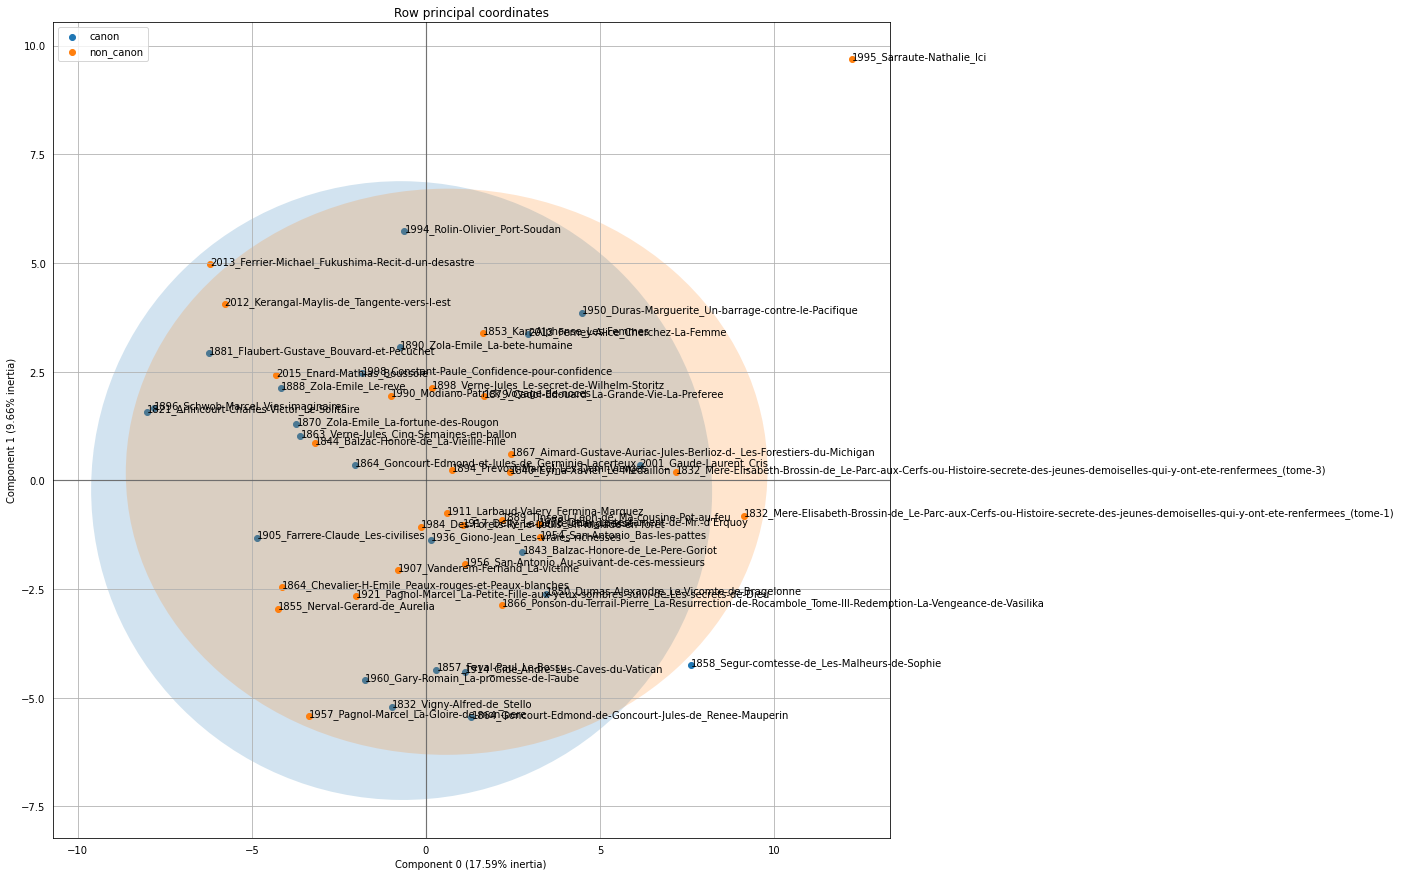

In [154]:
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(15, 15),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=y,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
     )

In [ ]:
#ax.get_figure().savefig('images/pca_row_coordinates.svg')

In [156]:
#.drop(['canon'], axis=1)
X = df_main.iloc[:50, :100]
y = df_main['canon'][:50]

In [157]:
ca = prince.CA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
     )

In [158]:
X.columns.rename('features', inplace=True)
X.index.rename('novels', inplace=True)

In [159]:
ca = ca.fit(X)

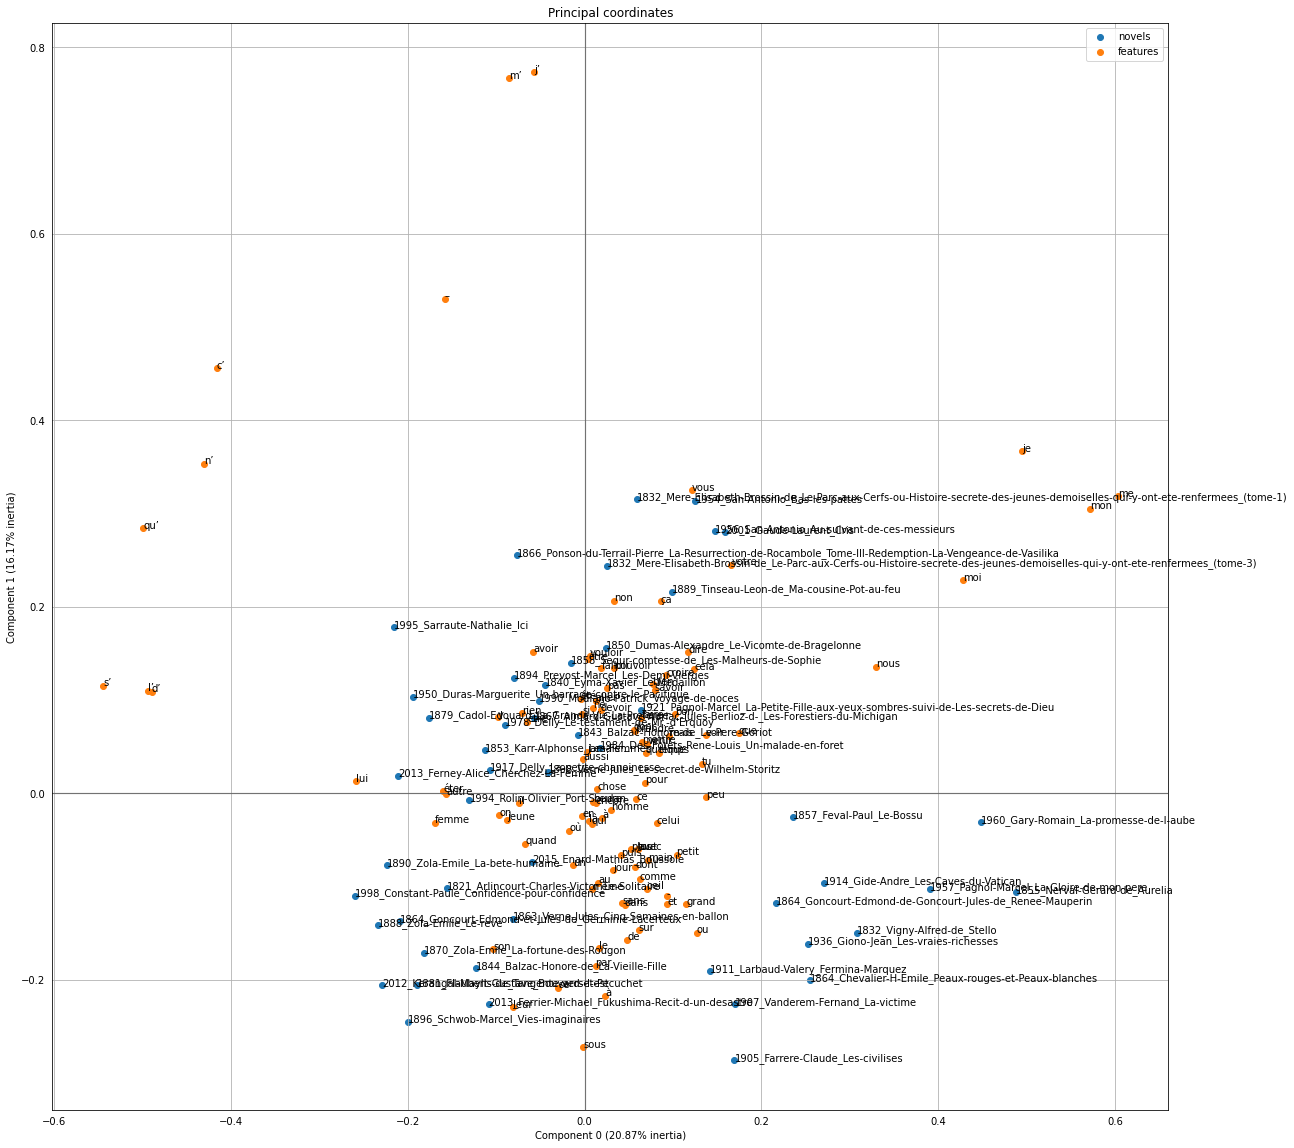

In [160]:
ax = ca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(20, 20),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
     )

In [ ]:
#ax.get_figure().savefig('images/ca_coordinates.svg')

In [6]:
df_balzac = pd.read_csv(r'auteurs_features\Balzac_features.csv')
df_balzac.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_balzac.set_index("index", inplace = True)
df_balzac = df_balzac.replace(np.nan, 0)

In [7]:
df_colette = pd.read_csv(r'auteurs_features\Colette_features.csv')
df_colette.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_colette.set_index("index", inplace = True)
df_colette = df_colette.replace(np.nan, 0)

In [16]:
df_test = df_balzac.append(df_colette)

<ipython-input-16-7e45531752e3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_balzac.append(df_colette)


In [180]:
#.iloc[:, :100]
#.drop(['canon'], axis=1)
X = df_colette.iloc[:,:100]
y = df_colette['canon']

In [181]:
pca = pca.fit(X)

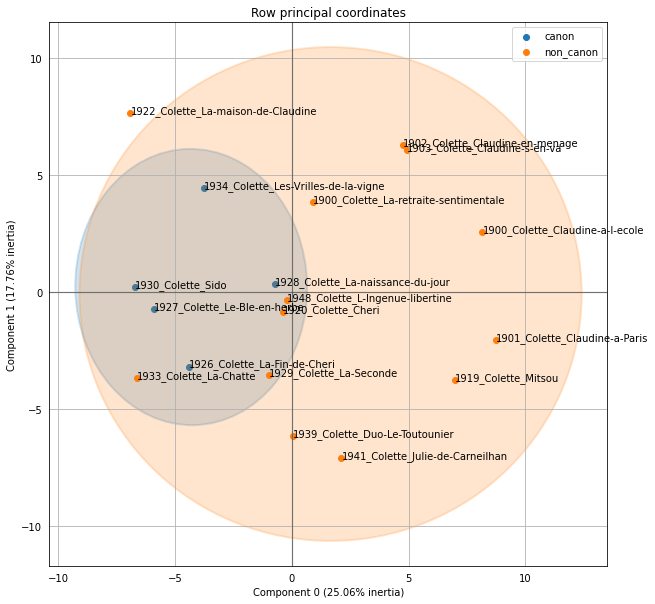

In [184]:
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=y,
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True
     )

In [185]:
ax.get_figure().savefig('img/pca_Colette.svg')

In [56]:
ca = ca.fit(X)

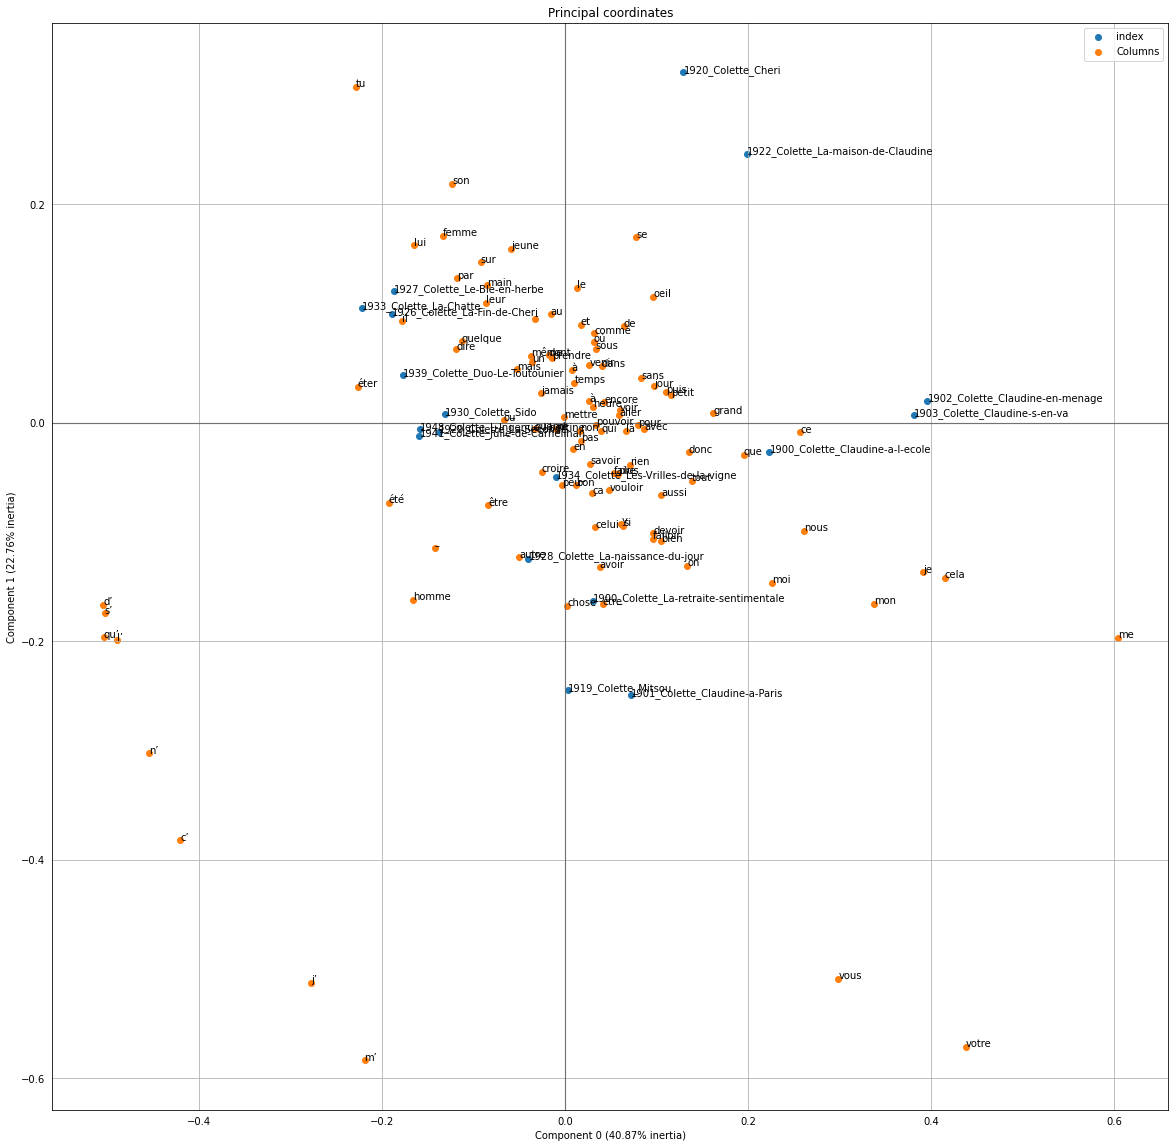

In [57]:
ax = ca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(20, 20),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
     )

In [169]:
def pca_ca_auteurs(auteur, rank):
    df = pd.read_csv("auteurs_features/"+auteur+'_features.csv')
    df.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
    df.set_index("index", inplace = True)
    df = df.replace(np.nan, 0)
    df = df.replace(np.inf, 0)
                     
    X = df.iloc[:,:rank]
    y = df['canon']
    
    pca = prince.PCA(
     n_components=2,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
     )
    
    pca = pca.fit(X)
    ax1 = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=y,
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True,
     )
   
    return ax1

In [172]:
ax1.title = 'hehe'

In [189]:
ax1.set_title("ACP Colette")

Text(0.5, 1.0, 'ACP Colette')

In [183]:
ax1

<AxesSubplot:title={'center':'ACP Georges Perec'}, xlabel='Component 0 (32.31% inertia)', ylabel='Component 1 (16.24% inertia)'>

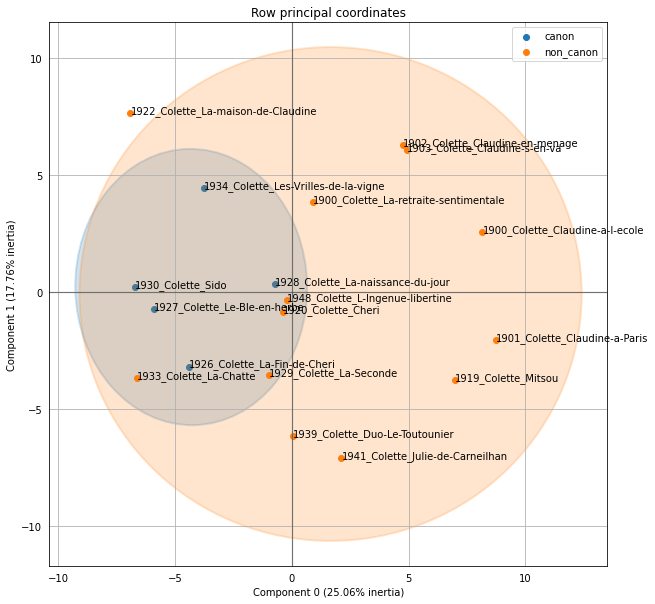

In [188]:
ax1 = pca_ca_auteurs('Colette', 100)

In [177]:
ax1

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (32.31% inertia)', ylabel='Component 1 (16.24% inertia)'>

In [190]:
ax1.get_figure().savefig('img/pca_Colette.svg')
#ax2.get_figure().savefig('img/pca_X.svg')